<a href="https://colab.research.google.com/github/Pranathi-star/dsbda/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

df = pd.read_csv('Month_Value_1.csv')

print(df.head(5))

       Period       Revenue  Sales_quantity  Average_cost  \
0  01.01.2015  1.601007e+07         12729.0   1257.763541   
1  01.02.2015  1.580759e+07         11636.0   1358.507000   
2  01.03.2015  2.204715e+07         15922.0   1384.697024   
3  01.04.2015  1.881458e+07         15227.0   1235.606705   
4  01.05.2015  1.402148e+07          8620.0   1626.621765   

   The_average_annual_payroll_of_the_region  
0                                30024676.0  
1                                30024676.0  
2                                30024676.0  
3                                30024676.0  
4                                30024676.0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [ ]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    64 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
 5   diff_1                                    63 non-null     float64
 6   forecast                                  13 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.0+ KB


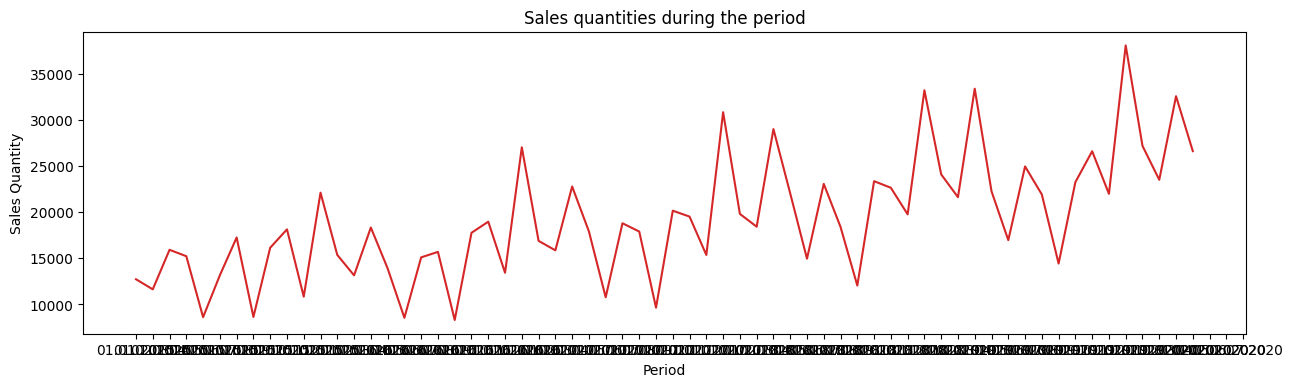

In [ ]:
def plot_df(df, x, y, title="", xlabel='Period', ylabel='Sales Quantity', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Period'], y=df['Sales_quantity'], title='Sales quantities during the period')


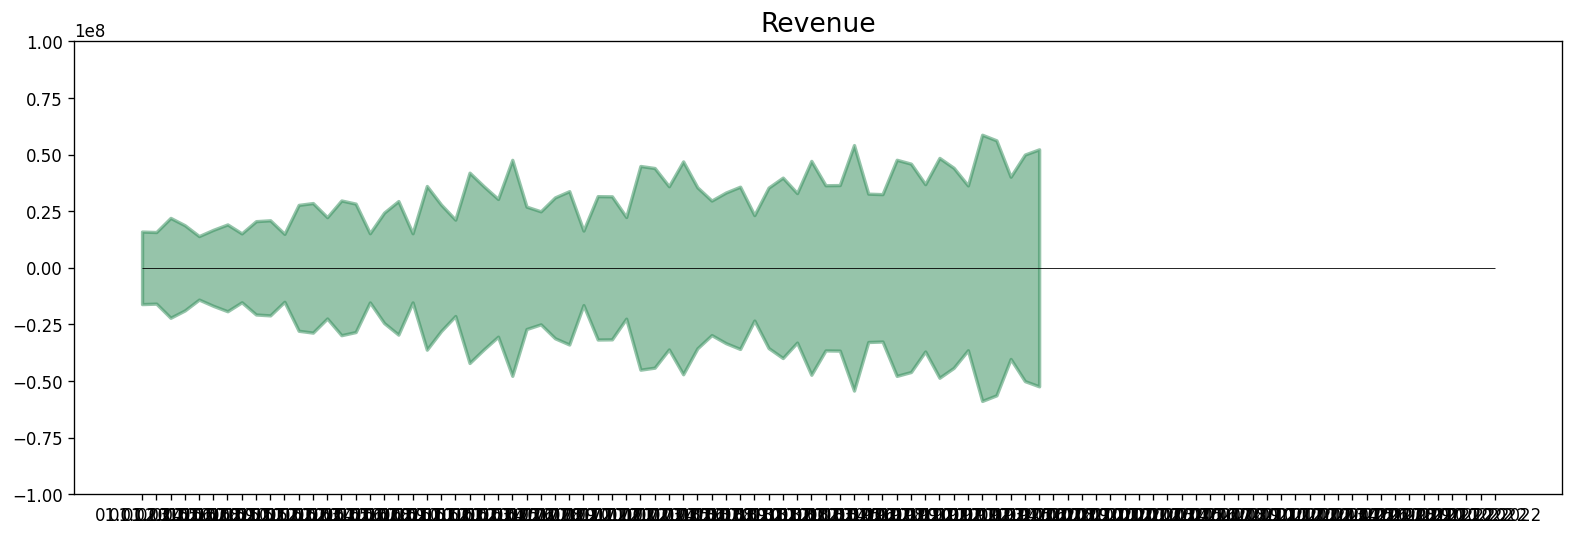

In [ ]:
x = df['Period'].values
y1 = df['Revenue'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-100000000, 100000000)
plt.title('Revenue', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Period']), xmax=np.max(df['Period']), linewidth=.5)
plt.show()

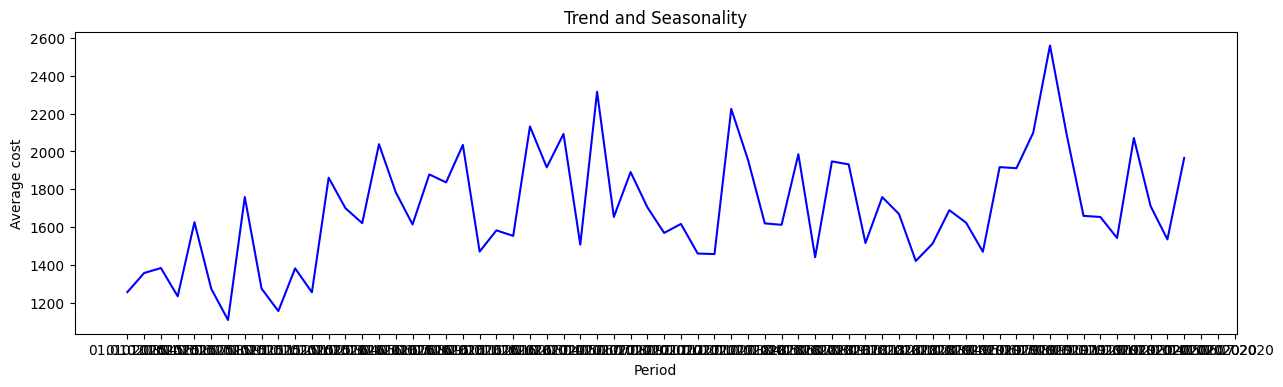

In [ ]:
def plot_df(df, x, y, title="", xlabel='Period', ylabel='Average cost', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Period'], y=df['Average_cost'], title='Trend and Seasonality')

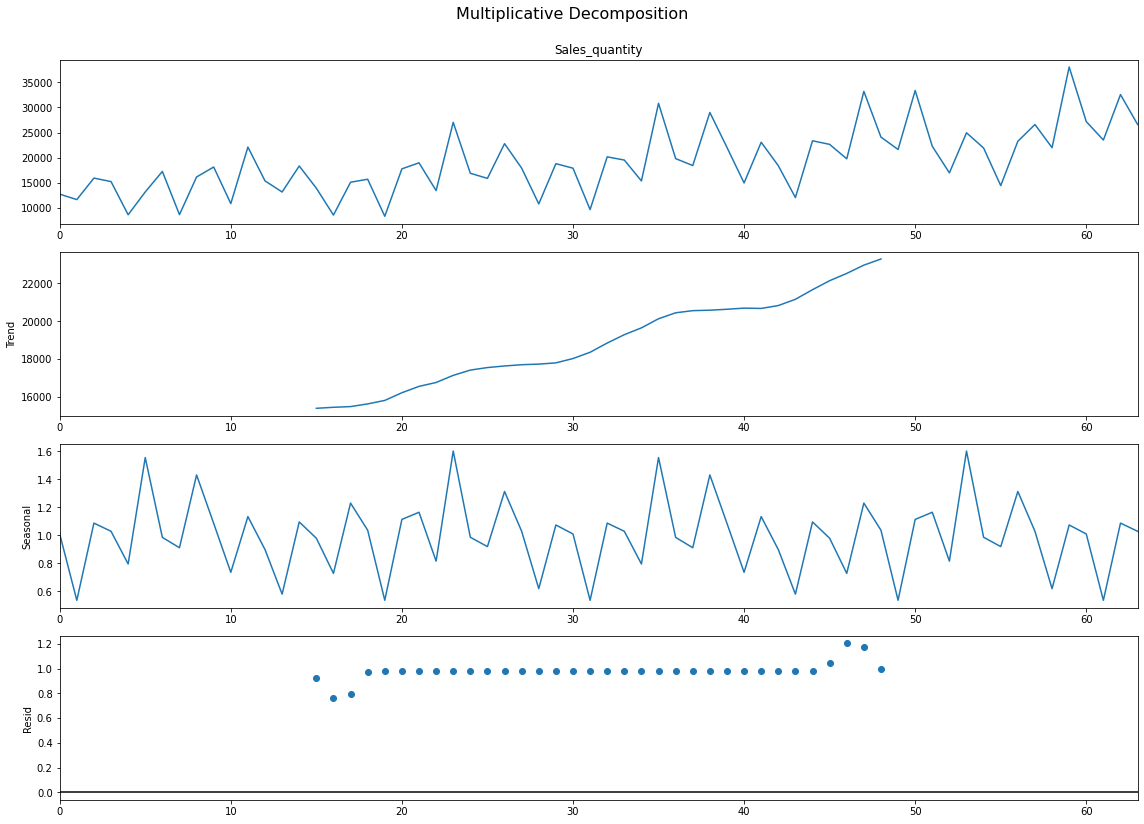

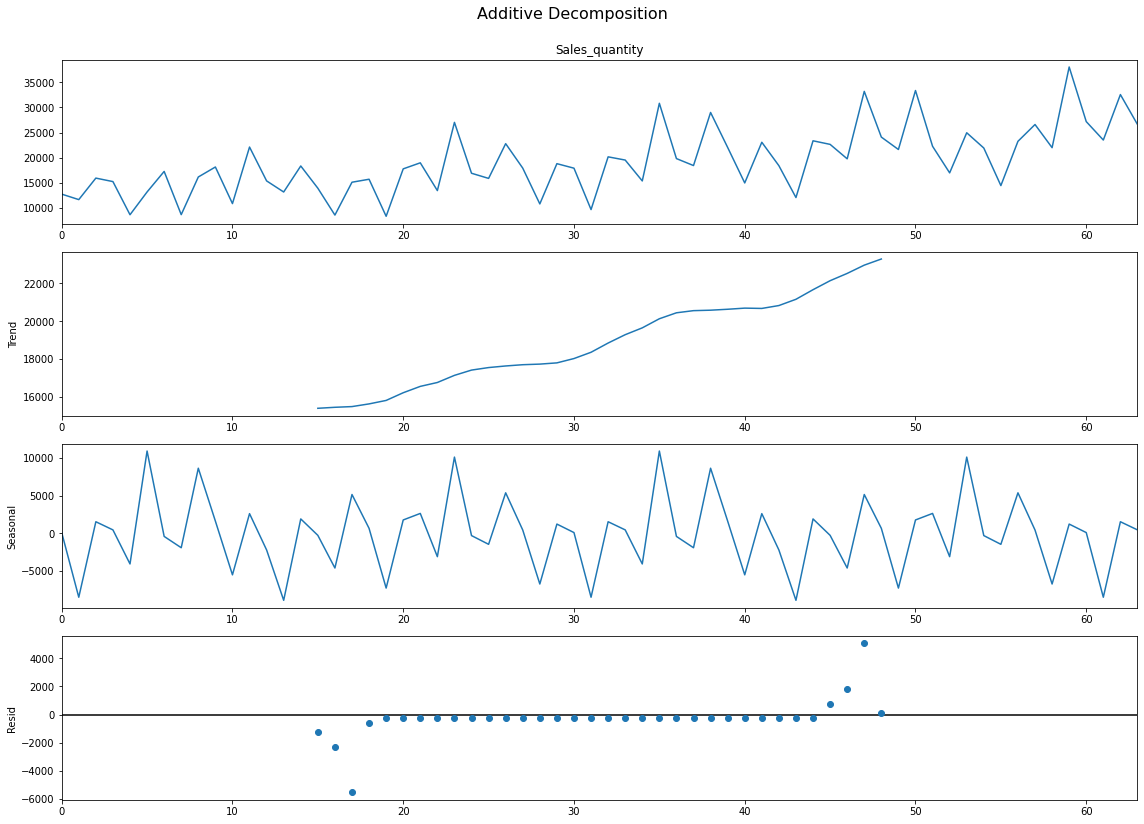

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
df = df.dropna()
multiplicative_decomposition = seasonal_decompose(df['Sales_quantity'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Sales_quantity'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Text(0.5, 1.0, 'Revenue detrended by subtracting the least squares fit')

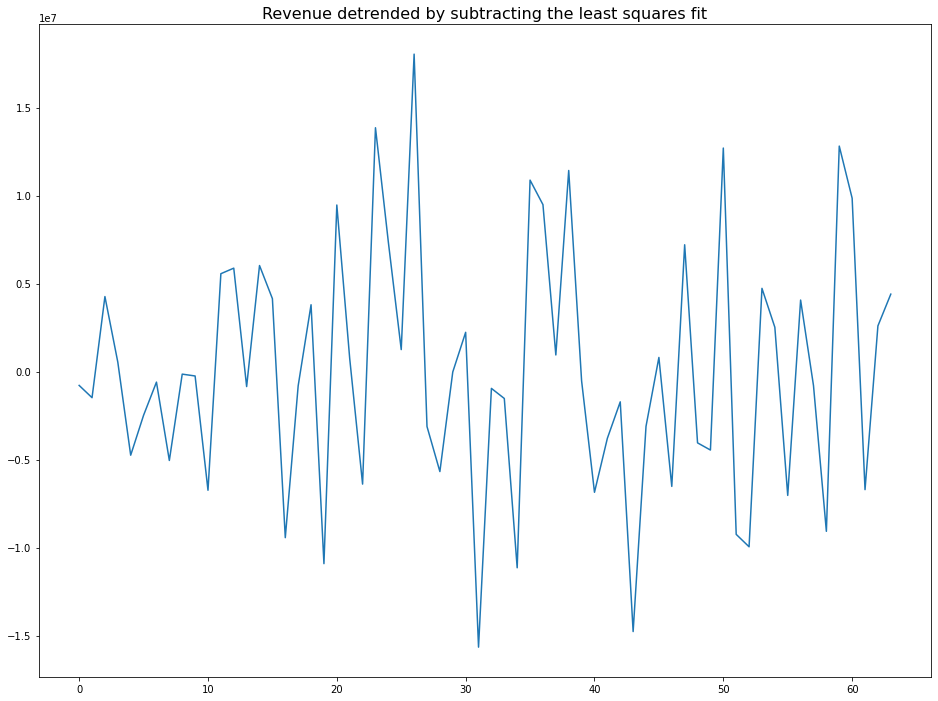

In [ ]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['Revenue'].values)
plt.plot(detrended)
plt.title('Revenue detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Revenue detrended by subtracting the trend component')

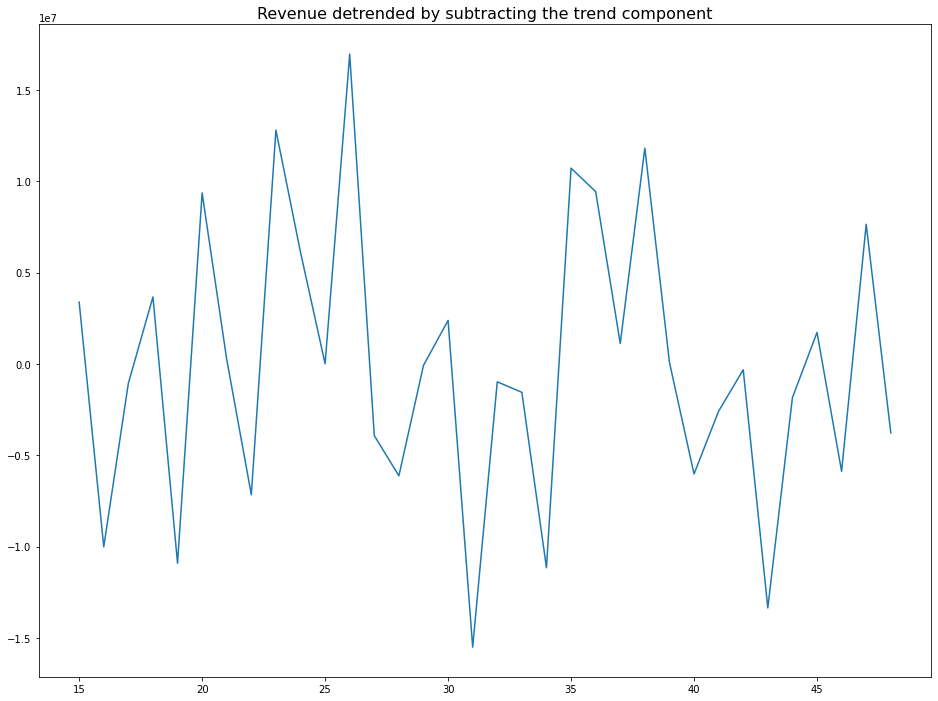

In [ ]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Revenue'], model='multiplicative', period=30)
detrended = df['Revenue'].values - result_mul.trend
plt.plot(detrended)
plt.title('Revenue detrended by subtracting the trend component', fontsize=16)

[]

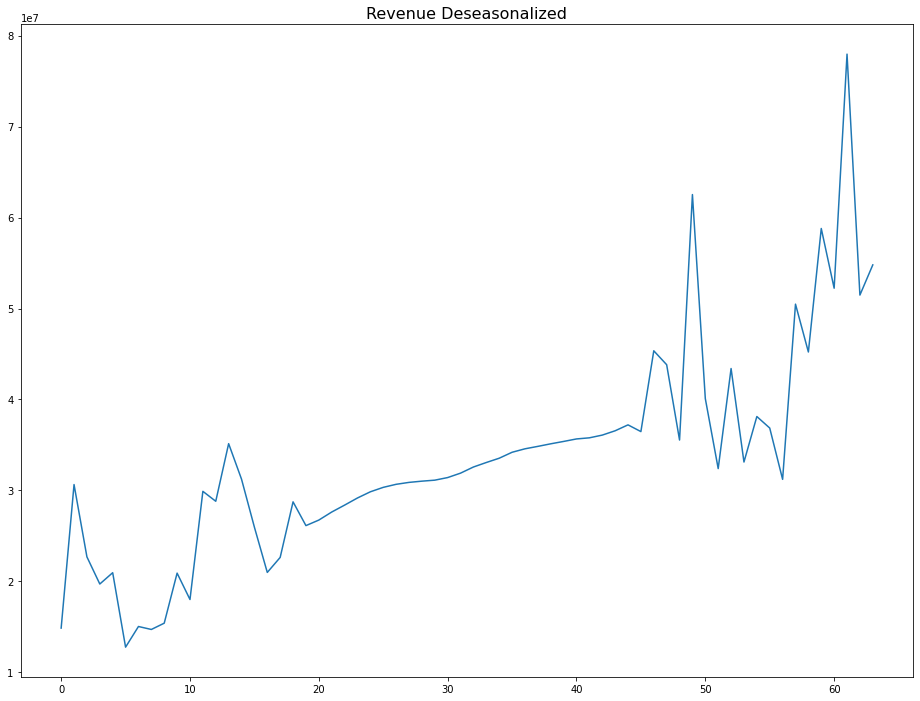

In [ ]:
# Time Series Decomposition
result_mul = seasonal_decompose(df['Revenue'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['Revenue'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Revenue Deseasonalized', fontsize=16)
plt.plot()

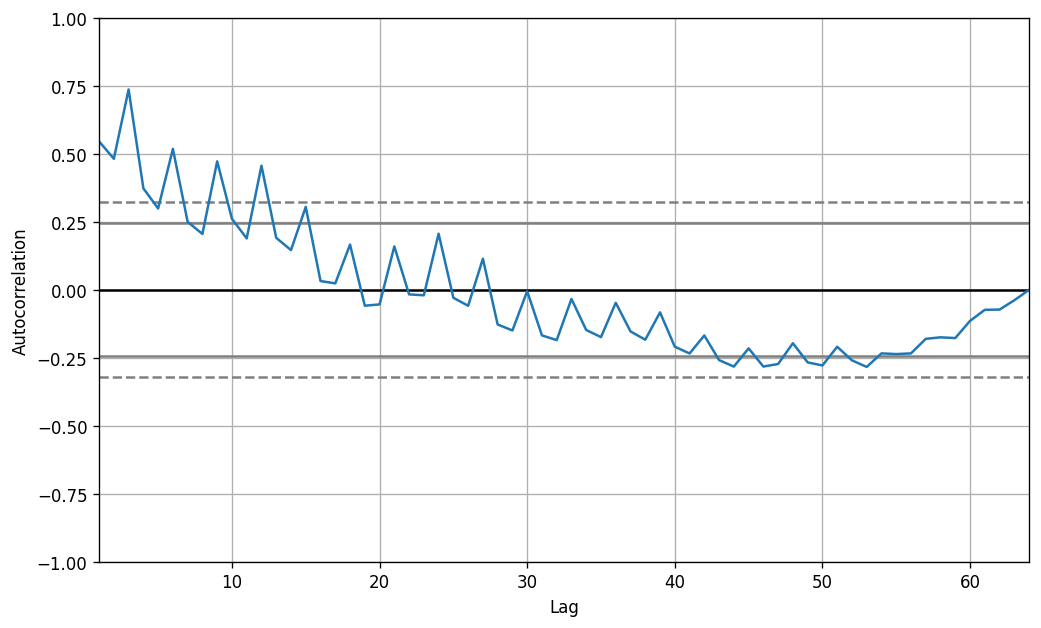

In [ ]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Revenue'].tolist())

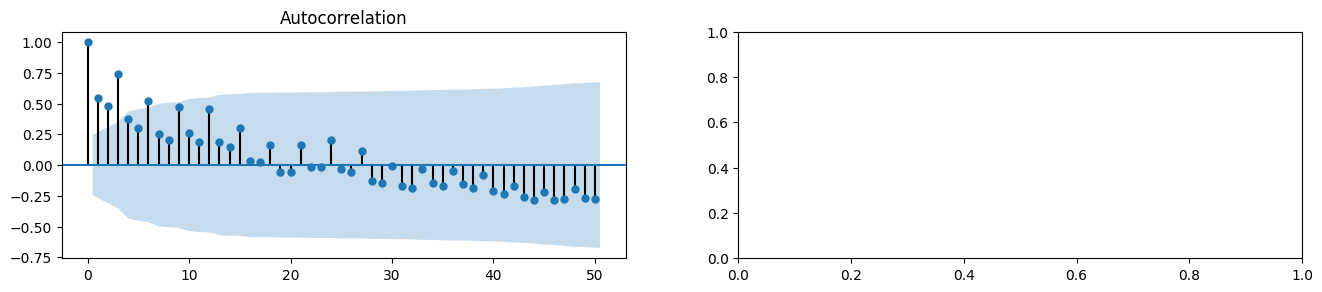

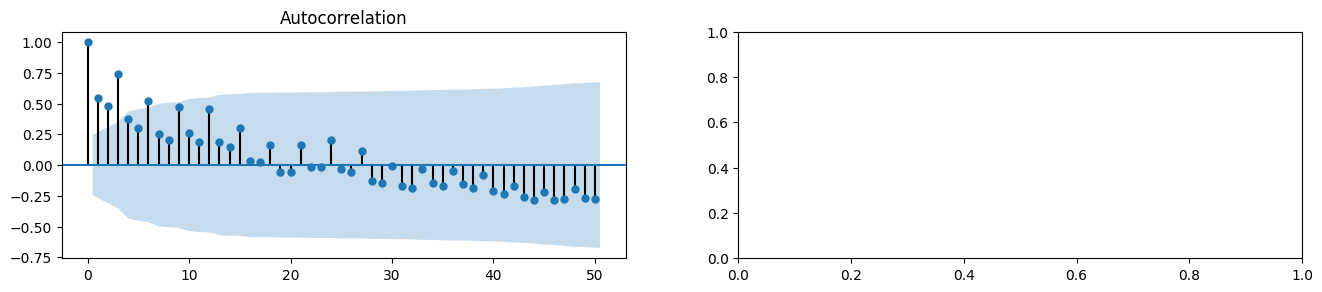

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Revenue'].tolist(), lags=50, ax=axes[0])

In [ ]:
# Augmented Dickey Fuller test (ADF Test)

from statsmodels.tsa.stattools import adfuller

data = df['Revenue'].values
pvalue = adfuller(data)[1]
if pvalue < 0.05:
  print("Series is stationary")
else:
  print("Series is non stationary")

Series is non stationary


In [ ]:
 # Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

from statsmodels.tsa.stattools import kpss

data = df['Revenue'].values
pvalue = kpss(data)[1]
if pvalue > 0.05:
  print("Series is stationary")
else:
  print("Series is non stationary")

Series is non stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [ ]:
# Philips Perron test (PP Test) 

from arch.unitroot import *

data = df['Revenue'].values
pvalue = PhillipsPerron(data, trend = 'ct')
pvalue

Test Statistic,-9.412
P-value,0.000
Lags,11


Series is stationary


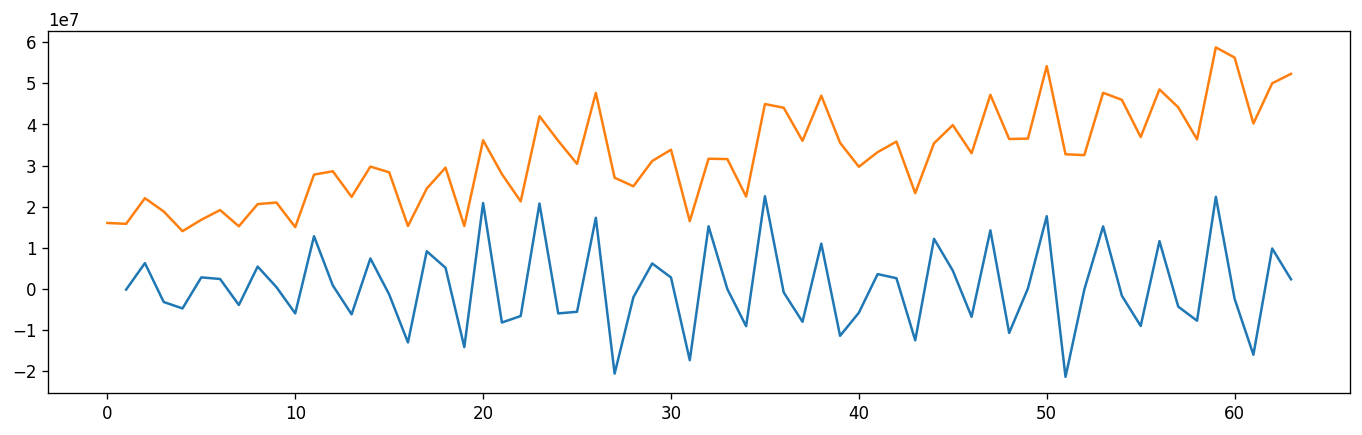

In [ ]:
# converting non stationary data to stationary using differencing

df["diff_1"] = df["Revenue"].diff(periods=1)
df.head(6)
pvalue = adfuller(df["diff_1"].dropna())[1]
if pvalue < 0.05:
  print("Series is stationary")
else:
  print("Series is non stationary")

df["diff_1"].plot(figsize=(14, 4));
df["Revenue"].plot(figsize=(14, 4));

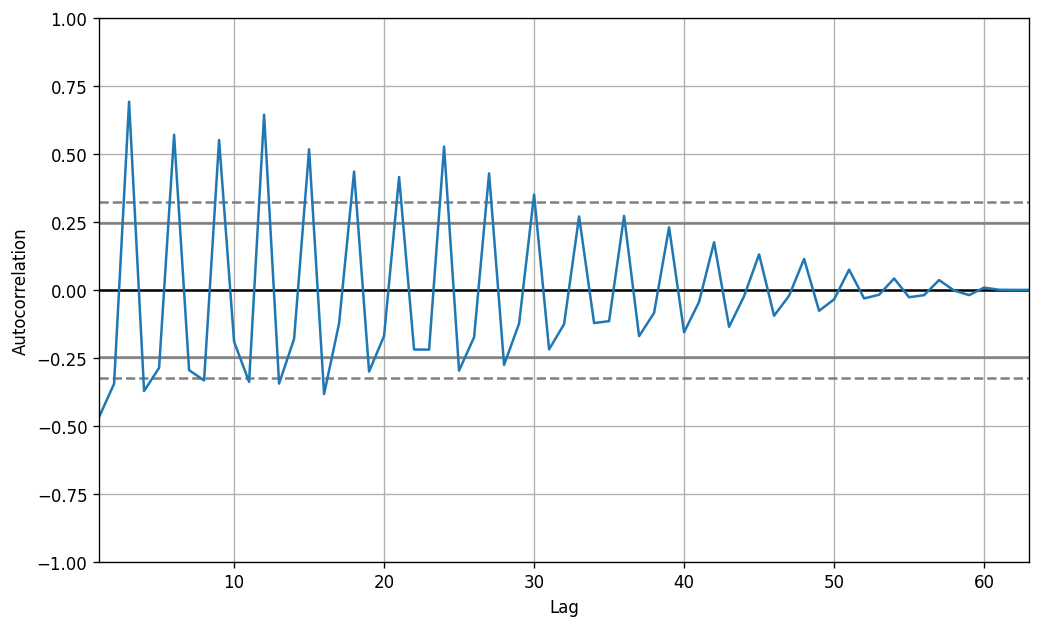

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['diff_1'].dropna())
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


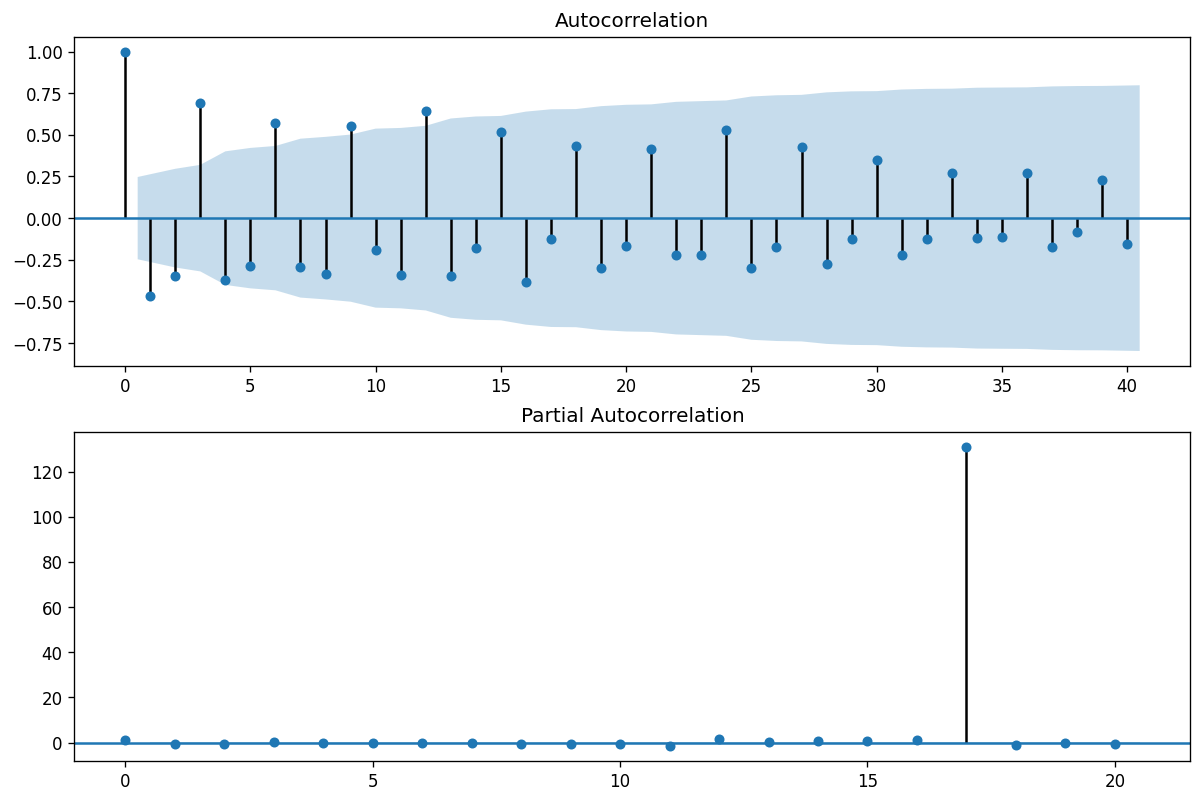

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['diff_1'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['diff_1'].dropna(),lags=20,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['diff_1'].dropna(),order=(1,1,0))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.diff_1   No. Observations:                   62
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1114.026
Method:                       css-mle   S.D. of innovations       15347988.732
Date:                Sun, 30 Oct 2022   AIC                           2234.053
Time:                        05:42:19   BIC                           2240.434
Sample:                             1   HQIC                          2236.558
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.034e+04   1.28e+06      0.032      0.975   -2.46e+06    2.54e+06
ar.L1.D.diff_1    -0.5361      0.105     -5.088      0.000      -0.743      -0.330
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8652           +0.0000j            1.8652            0.5000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


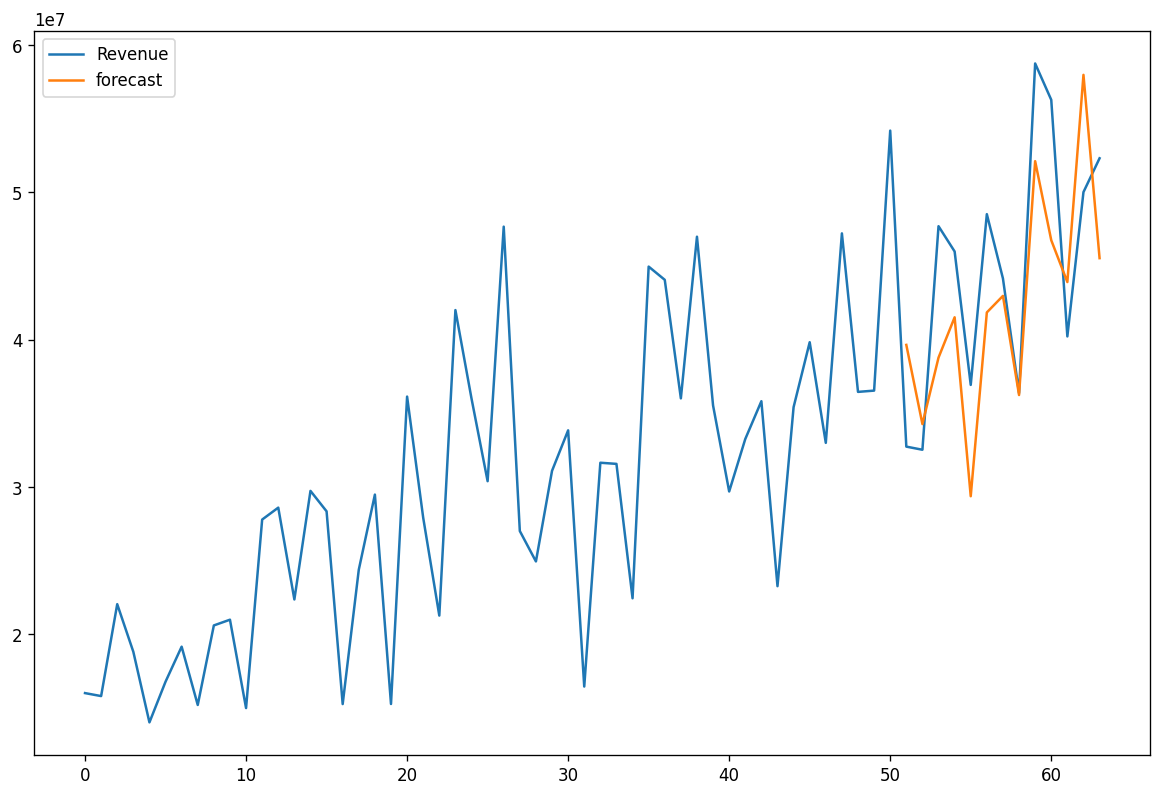

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Revenue'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
train_len = int(len(df['Revenue']) * 0.8)
df['forecast']=results.predict(start=train_len,end=len(df['Revenue']),dynamic=True)
df[['Revenue','forecast']].plot(figsize=(12,8))